## Correlação e Regressão

### Importações

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import math

### Base de Dados

In [2]:
# Dados
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [3]:
# Transformando os dados em Dataframes
ds = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
ds

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
# Média da coluna tamanho e preço
media_tamanho = ds['tamanho'].mean()
media_preco = ds['preco'].mean()
media_tamanho, media_preco

(44.5, 73250.0)

In [5]:
# Desvio padrão da coluna tamanho e preço
dp_tamanho = ds['tamanho'].std()
dp_preco = ds['preco'].std()
dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

### Correlação - Cálculo Manual

In [6]:
# Criando a coluna de diferencia entre os valores
ds['dif'] = (ds['tamanho'] - media_tamanho) * (ds['preco'] - media_preco)
ds

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [7]:
# Somando todos os valores da coluna dif
soma_dif = ds['dif'].sum()
soma_dif

535500.0

In [8]:
# Calculando a Covariância
covariancia = soma_dif / (len(ds) - 1)
covariancia

178500.0

In [9]:
# Coeficiente de Correlação
coeficiente_correlacao = covariancia / (dp_tamanho * dp_preco)
coeficiente_correlacao

0.9962006267707775

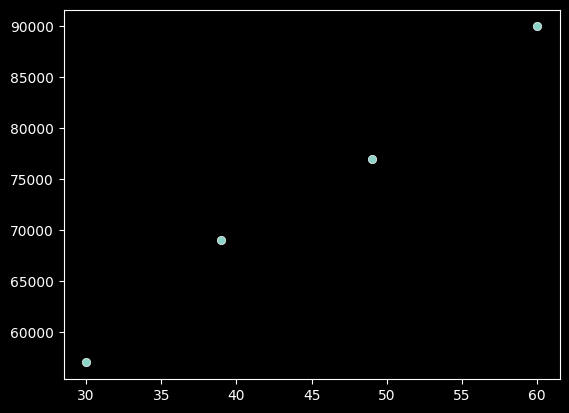

In [10]:
# Gráfico
sns.scatterplot(x=tamanho, y=preco);

In [11]:
# Coeficiente de Determinação
coeficiente_determinacao = math.pow(coeficiente_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

### Correlação - Cálculo com Numpy e Pandas

In [12]:
# Calculando a Covariância com Numpy
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [13]:
# Calculando a Covariância com Pandas
ds.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [14]:
# Coeficiente de Correlação com Numpy
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [15]:
# Coeficiente de Correlação com Pandas
ds.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


## Correlação com a biblioteca Yellowbrick
- https://www.scikit-yb.org/en/latest/

### Importação

In [16]:
# Lib
from yellowbrick.target import FeatureCorrelation

### Base de Dados

In [17]:
# dados
df = pd.read_csv('../Distribuições_Estatisticas/house_prices.csv')
# Eliminando os dados
df = df.drop(['id', 'date', 'sqft_living', 'sqft_lot'], axis = 1)
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
# Nomes das colunas
df.columns[1:]

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

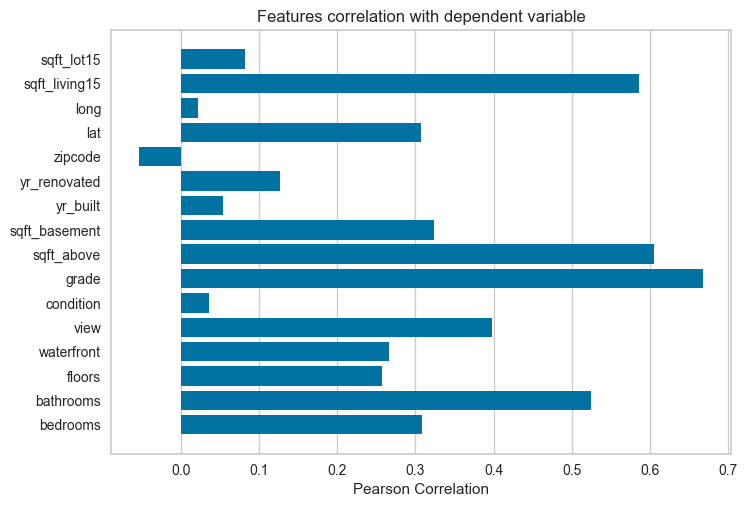

In [19]:
# Gráfico de correlação
grafico = FeatureCorrelation(labels=df.columns[1:])
grafico.fit(df.iloc[:, 1:17].values, df.iloc[:, 0].values)
grafico.show();